# Hurricane Landing Distribution

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults
from sithom.xr import plot_units
from src.constants import IBTRACS_NC, LANDING_DS
from src.data_loading.ibtracs import gom_tcs

plot_defaults()

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [3]:
from src.data_loading.ibtracs import make_landing_dataset


ds = make_landing_dataset()

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


Starting loop.
Finished loop.
'_landing_list'  0.48107 s 

[98000. 96500.    nan    nan 96100.    nan 98700.    nan 96400. 94600.
 93400.    nan 97900. 97600.    nan    nan    nan    nan 94200. 98000.
 98500. 96700. 97200.    nan 95200.    nan    nan 97200. 95500. 93100.
    nan    nan    nan    nan    nan    nan 98200.    nan    nan    nan
    nan    nan 95000. 97300.    nan    nan 95900. 94200.    nan 96700.
    nan    nan    nan 94000. 94400. 98100. 94900. 96200. 95000.    nan
 93200. 95900. 97000. 97000.    nan 93100.    nan 96300. 98900. 98400.
 98600. 99000. 93700. 94800. 93600. 99000. 94900. 98300. 98400. 94900.
 94600. 95500. 98000. 98700. 96400. 92700. 95000. 91900. 98200.    nan
 98400. 96600. 97500. 97500. 99300. 96100. 98000. 95100.    nan    nan
    nan 92500. 98700. 95800. 98300.    nan    nan 97300. 97400. 97300.
 93900. 97000. 97000.    nan 96500.    nan 97000. 98300. 96200.    nan
 96700. 93100. 98000. 99100. 97900. 97500. 96000.    nan    nan 97800.
    nan 96300. 968

In [4]:
ds

<xarray.Dataset>
Dimensions:      (time: 192, quadrant: 4)
Coordinates:
    time         (time) datetime64[ns] 1990-08-07T19:00:00.000067072 ... 1903...
    lat          (time) float32 20.9 29.6 28.13 29.93 ... 29.8 29.2 29.3 30.1
    lon          (time) float32 -97.0 -83.4 -96.57 -85.67 ... -95.0 -94.7 -85.6
Dimensions without coordinates: quadrant
Data variables: (12/16)
    nature       (time) |S2 b'TS' b'TS' b'TS' b'TS' ... b'TS' b'TS' b'TS' b'TS'
    basin        (time) |S2 b'NA' b'NA' b'NA' b'NA' ... b'NA' b'NA' b'NA' b'NA'
    subbasin     (time) |S2 b'GM' b'GM' b'GM' b'GM' ... b'GM' b'GM' b'GM' b'GM'
    name         (time) |S128 b'DIANA' b'NOT_NAMED' ... b'IKE' b'NOT_NAMED'
    storm_speed  (time) float32 6.173 4.63 2.572 6.173 ... 6.173 6.688 5.659
    storm_dir    (time) float32 267.0 0.0 286.0 37.0 ... 10.0 0.0 335.0 337.0
    ...           ...
    usa_poci     (time) float32 nan nan nan nan nan ... nan nan 1.007e+05 nan
    usa_lat      (time) float32 20.9 29.6 28.2 30.1 30.2 ... 29.8 29.2 29.3 30.1
    usa_r34      (time, quadrant) float32 nan nan nan nan ... nan nan nan nan
    usa_r50      (time, quadrant) float32 nan nan nan nan ... nan nan nan nan
    usa_r64      (time, quadrant) float32 nan nan nan nan ... nan nan nan nan
    usa_record   (time) |S1 b'L' b'L' b'L' b'L' b'L' ... b'L' b'L' b'L' b'L'
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

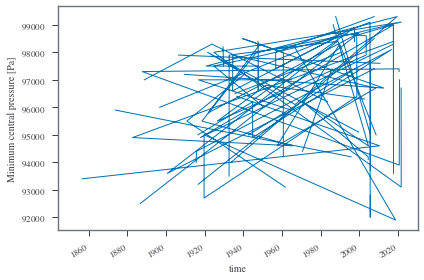

In [9]:
ds.usa_pres.plot(x="time")

Text(0.5, 0, 'Year')

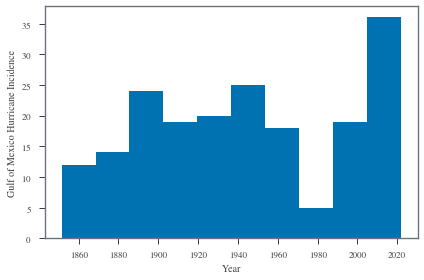

In [6]:
plt.hist(ds.time.values)
plt.ylabel("Gulf of Mexico Hurricane Incidence")
plt.xlabel("Year")

(array([ 3.,  6., 10., 12., 14., 12., 17., 16., 25., 16.]),
 array([919. , 926.4, 933.8, 941.2, 948.6, 956. , 963.4, 970.8, 978.2,
        985.6, 993. ], dtype=float32),
 <BarContainer object of 10 artists>)

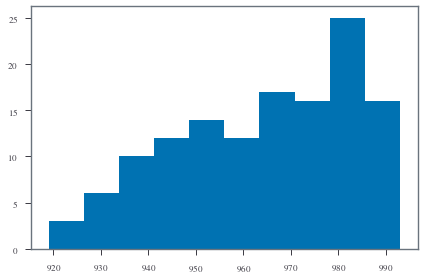

In [7]:
from src.conversions import pascal_to_millibar
plt.hist(pascal_to_millibar(ds.usa_pres.values))

((0.12927641302779486, 18.107857648801374, 906.1485639982502, 82.62831955551712),)


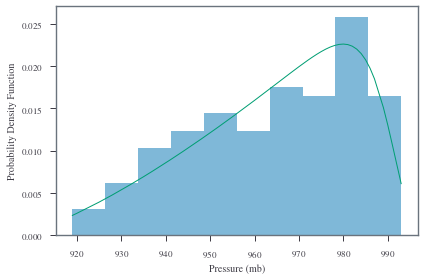

(0.12927641302779486, 18.107857648801374, 906.1485639982502, 82.62831955551712)


array([963.47511973, 980.20862621, 949.00205952, 966.8302103 ,
       966.28322274, 979.71959177, 979.08880649, 957.09776149,
       962.04432624, 939.82355006, 945.99395533, 957.93664279,
       968.24187376, 937.18075862, 991.63345871, 951.1246645 ,
       985.080068  , 977.28516701, 976.96520333, 968.825995  ,
       982.97645835, 956.92873763, 965.80120918, 979.05021346,
       980.43766131, 983.8781946 , 985.60181368, 950.67857641,
       946.145163  , 980.35254177, 979.76980323, 944.54127632,
       971.1119398 , 953.34191258, 961.20901246, 991.6154344 ,
       988.77130123, 959.82412097, 928.62247514, 946.57081696,
       977.10926745, 978.59377633, 923.97272193, 964.86293181,
       927.76396243, 933.31505283, 934.05501327, 976.69926835,
       921.83848081, 938.03662685, 944.59509841, 979.1156438 ,
       978.83067759, 973.33042931, 994.57704994, 973.08309464,
       943.50470302, 972.16581994, 936.65882221, 981.47993534,
       987.94180577, 966.73145553, 929.49638639, 926.43

In [13]:
from scipy import stats
import matplotlib.pyplot as plt
data = pascal_to_millibar(ds.usa_pres.values)

data =  data[np.argsort(data)]

data = data[~np.isnan(data)]

_ = plt.hist(data, alpha=0.5, density=True) #, #bins=np.linspace(0, 16, 33), alpha=0.5)
param = stats.exponweib.fit(data),# 1, 1, scale=2, loc=0)
print(param)
if isinstance(param[0], tuple):
    param = param[0]
plt.plot(data, stats.exponweib(*param).pdf(data))# 1, 1, scale=2, loc=0)))

plt.xlabel("Pressure (mb)")
plt.ylabel("Probability Density Function")
plt.show()
print(param)
stats.exponweib(*param).rvs(size=100)

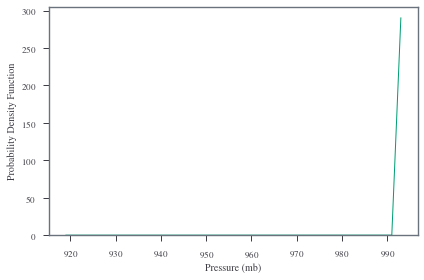

(0.2623514337165774, 993.0000628502614, 1.3416982420211745)


array([992.89683341, 992.99929157, 988.65684632, 992.9089459 ,
       993.00005797, 989.18990268, 992.93992573, 992.99987571,
       992.82757094, 992.78901746, 992.99859995, 992.99987207,
       992.99161457, 986.93110561, 604.02597505, 992.97359267,
       992.95212915, 992.99962012, 992.9999454 , 981.97419898,
       931.54614648, 993.00006277, 208.77770129, 989.91017385,
       992.31011981, 990.11424786, 991.20277343, 992.99129587,
       990.67250439, 992.95789061, 972.03254715, 992.999077  ,
       991.31895958, 993.00006001, 993.00006285, 992.04398832,
       992.75500292, 992.55059347, 947.44196851, 629.94715446,
       773.7983267 , 992.7190914 , 992.79764924, 927.83859467,
       992.82302027, 992.87333436, 992.98177819, 993.00001647,
       991.29141922, 991.93186043, 992.9972568 , 992.94642142,
       992.98834174, 992.99959706, 981.53019612, 959.98757945,
       987.42071354, 992.63458697, 992.91517103, 991.07898336,
       992.94298894, 992.36747933, 992.94026275, 992.97

In [14]:
from scipy import stats
import matplotlib.pyplot as plt
data = pascal_to_millibar(ds.usa_pres.values)

data =  data[np.argsort(data)]

data = data[~np.isnan(data)]

_ = plt.hist(data, alpha=0.5, density=True) #, #bins=np.linspace(0, 16, 33), alpha=0.5)
param = stats.weibull_max.fit(data) # ,# 1, 1, scale=2, loc=0)

if isinstance(param[0], tuple):
    param = param[0]
plt.plot(data, stats.weibull_max(*param).pdf(data)) # 1, 1, scale=2, loc=0)))

plt.xlabel("Pressure (mb)")
plt.ylabel("Probability Density Function")
plt.show()
print(param)
stats.weibull_max(*param).rvs(size=100)

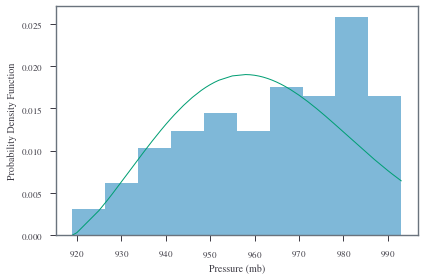

(2.3012174659759888, 918.9990711901514, 49.81859842590945)


In [16]:
from scipy import stats
import matplotlib.pyplot as plt

data = pascal_to_millibar(ds.usa_pres.values)
data =  data[np.argsort(data)]
data = data[~np.isnan(data)]

_ = plt.hist(data, alpha=0.5, density=True) #, #bins=np.linspace(0, 16, 33), alpha=0.5)

param = stats.weibull_min.fit(data) # ,# 1, 1, scale=2, loc=0)
if isinstance(param[0], tuple):
    param = param[0]
plt.plot(data, stats.weibull_min(*param).pdf(data)) # 1, 1, scale=2, loc=0)))

plt.xlabel("Pressure (mb)")
plt.ylabel("Probability Density Function")
plt.show()

print(param)
dist = stats.weibull_min(*param).rvs(size=int(1e6))

In [22]:
dist[dist < 980].shape[0] / 1e6

0.797249

In [ ]:
stats.weibull_min(*param).pdf(data)

In [ ]:
param = stats.weibull_min.fit(data)
param

In [ ]:
stats.weibull_min(*param).pdf(data)

In [ ]:
stats.exponweib(*param).rvs(size=100)

In [ ]:
?stats.exponweib

In [ ]:
?plt.hist

In [ ]:
stats.exponweib.fit?

In [ ]:
from src.conversions import pascal_to_millibar
plt.hist(pascal_to_millibar(ds.usa_pres.values)-5)

In [ ]:
from src.plot.map import map_axes

In [ ]:
map_axes?

In [ ]:
map_axes()
plot_defaults()
plt.scatter(ds.lon.values, ds.lat.values)
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")
plt.gca()


In [ ]:
plot_defaults()
map_axes()
from src.conversions import pascal_to_millibar

plt.scatter(
    ds.lon.values, ds.lat.values, c=ds.usa_pres.values
)  # , vmin=900e2, vmax=1000e2)
plt.colorbar(label="Central Pressure [Pa]")
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

In [ ]:
plot_defaults()
map_axes()
from src.conversions import pascal_to_millibar

plt.scatter(ds.lon.values, ds.lat.values, c=ds.usa_wind.values)
plt.colorbar(label="Maximum Wind Speed [m s$^{-1}$]")
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

In [ ]:
plot_defaults()
map_axes()
from src.conversions import pascal_to_millibar

plt.scatter(ds.lon.values, ds.lat.values, c=ds.usa_rmw.values)
plt.colorbar(label="Maximum Wind Speed Radius [m]")
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

In [ ]:
plot_defaults()
plt.scatter(ds.usa_pres.values / 1e2, ds.usa_rmw.values / 1e3, c=ds.usa_wind.values)
plt.xlabel("Minimum Central Pressure [Pa]")
plt.ylabel("Maximum Wind Speed Radius [km]")
plt.colorbar(label="Maximum wind speed [m s$^{-1}$]")

In [ ]:
plot_defaults()
plt.scatter(ds.usa_wind.values, ds.usa_rmw.values / 1e3, c=ds.usa_pres.values / 1e2)
plt.colorbar(label="Minimum Central Pressure [Pa]")
plt.ylabel("Maximum Wind Speed Radius [km]")
plt.xlabel("Maximum wind speed [m s$^{-1}$]")

In [ ]:
plot_defaults()
plt.scatter(ds.usa_wind.values, ds.usa_rmw.values / 1e3, c=ds.usa_pres.values / 1e2)
plt.colorbar(label="Minimum Central Pressure [Pa]")
plt.ylabel("Maximum Wind Speed Radius [km]")
plt.xlabel("Maximum Wind Speed [m s$^{-1}$]")

In [ ]:
ds

In [ ]:
ds.usa_pres

In [ ]:
ds.usa_pres

In [ ]:
from src.data_loading.ibtracs import katrina

In [ ]:
katrina().storm_speed.rename({"date_time": "time"}).plot(x="time")

In [ ]:
katrina().storm_dir.rename({"date_time": "time"}).plot(x="time")

In [ ]:
katrina()

In [ ]:
from src.preprocessing.sel import mid_katrina

In [ ]:
from src.constants import MID_KATRINA_TIME

In [ ]:
MID_KATRINA_TIME

In [ ]:
katrina()  # .storm_speed.rename({"date_time": "time"}).drop("storm")

In [ ]:
from src.conversions import si_ify

si_ify(katrina())
si_ify(katrina())

In [ ]:
katrina().usa_poci.rename({"date_time": "time"}).plot(x="time")

In [ ]:
from src.data_loading.ibtracs import kat_stats


kat_stats()